# Seminar 5

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts

import IPython.display as dp
import matplotlib.pyplot as plt
import seaborn as sns

dp.set_matplotlib_formats("retina")
sns.set(style="whitegrid", font_scale=1.5)
sns.despine()

%matplotlib inline

/var/folders/33/j0cl7y453td68qb96j7bqcj4cf41kc/T/ipykernel_1174/3109700056.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  dp.set_matplotlib_formats("retina")


In [2]:
plt.rc("figure", figsize=(20, 10))
plt.rc("font", size=13)

## CDFs

Reminder: the cumulative distribution function (CDF) is defined as
$$
F_X(x) = \mathbb{P}(X \leqslant x)
$$

It has the following properties:
- $F_X$ is non-decreasing
- $\lim\limits_{x\to-\infty}F_X(x) = 0$
- $\lim\limits_{x\to+\infty}F_X(x) = 1$
- $F_X$ if right-continuous

## Example 1

Draw PMF and CDF of $Bi(3, 0.7)$.

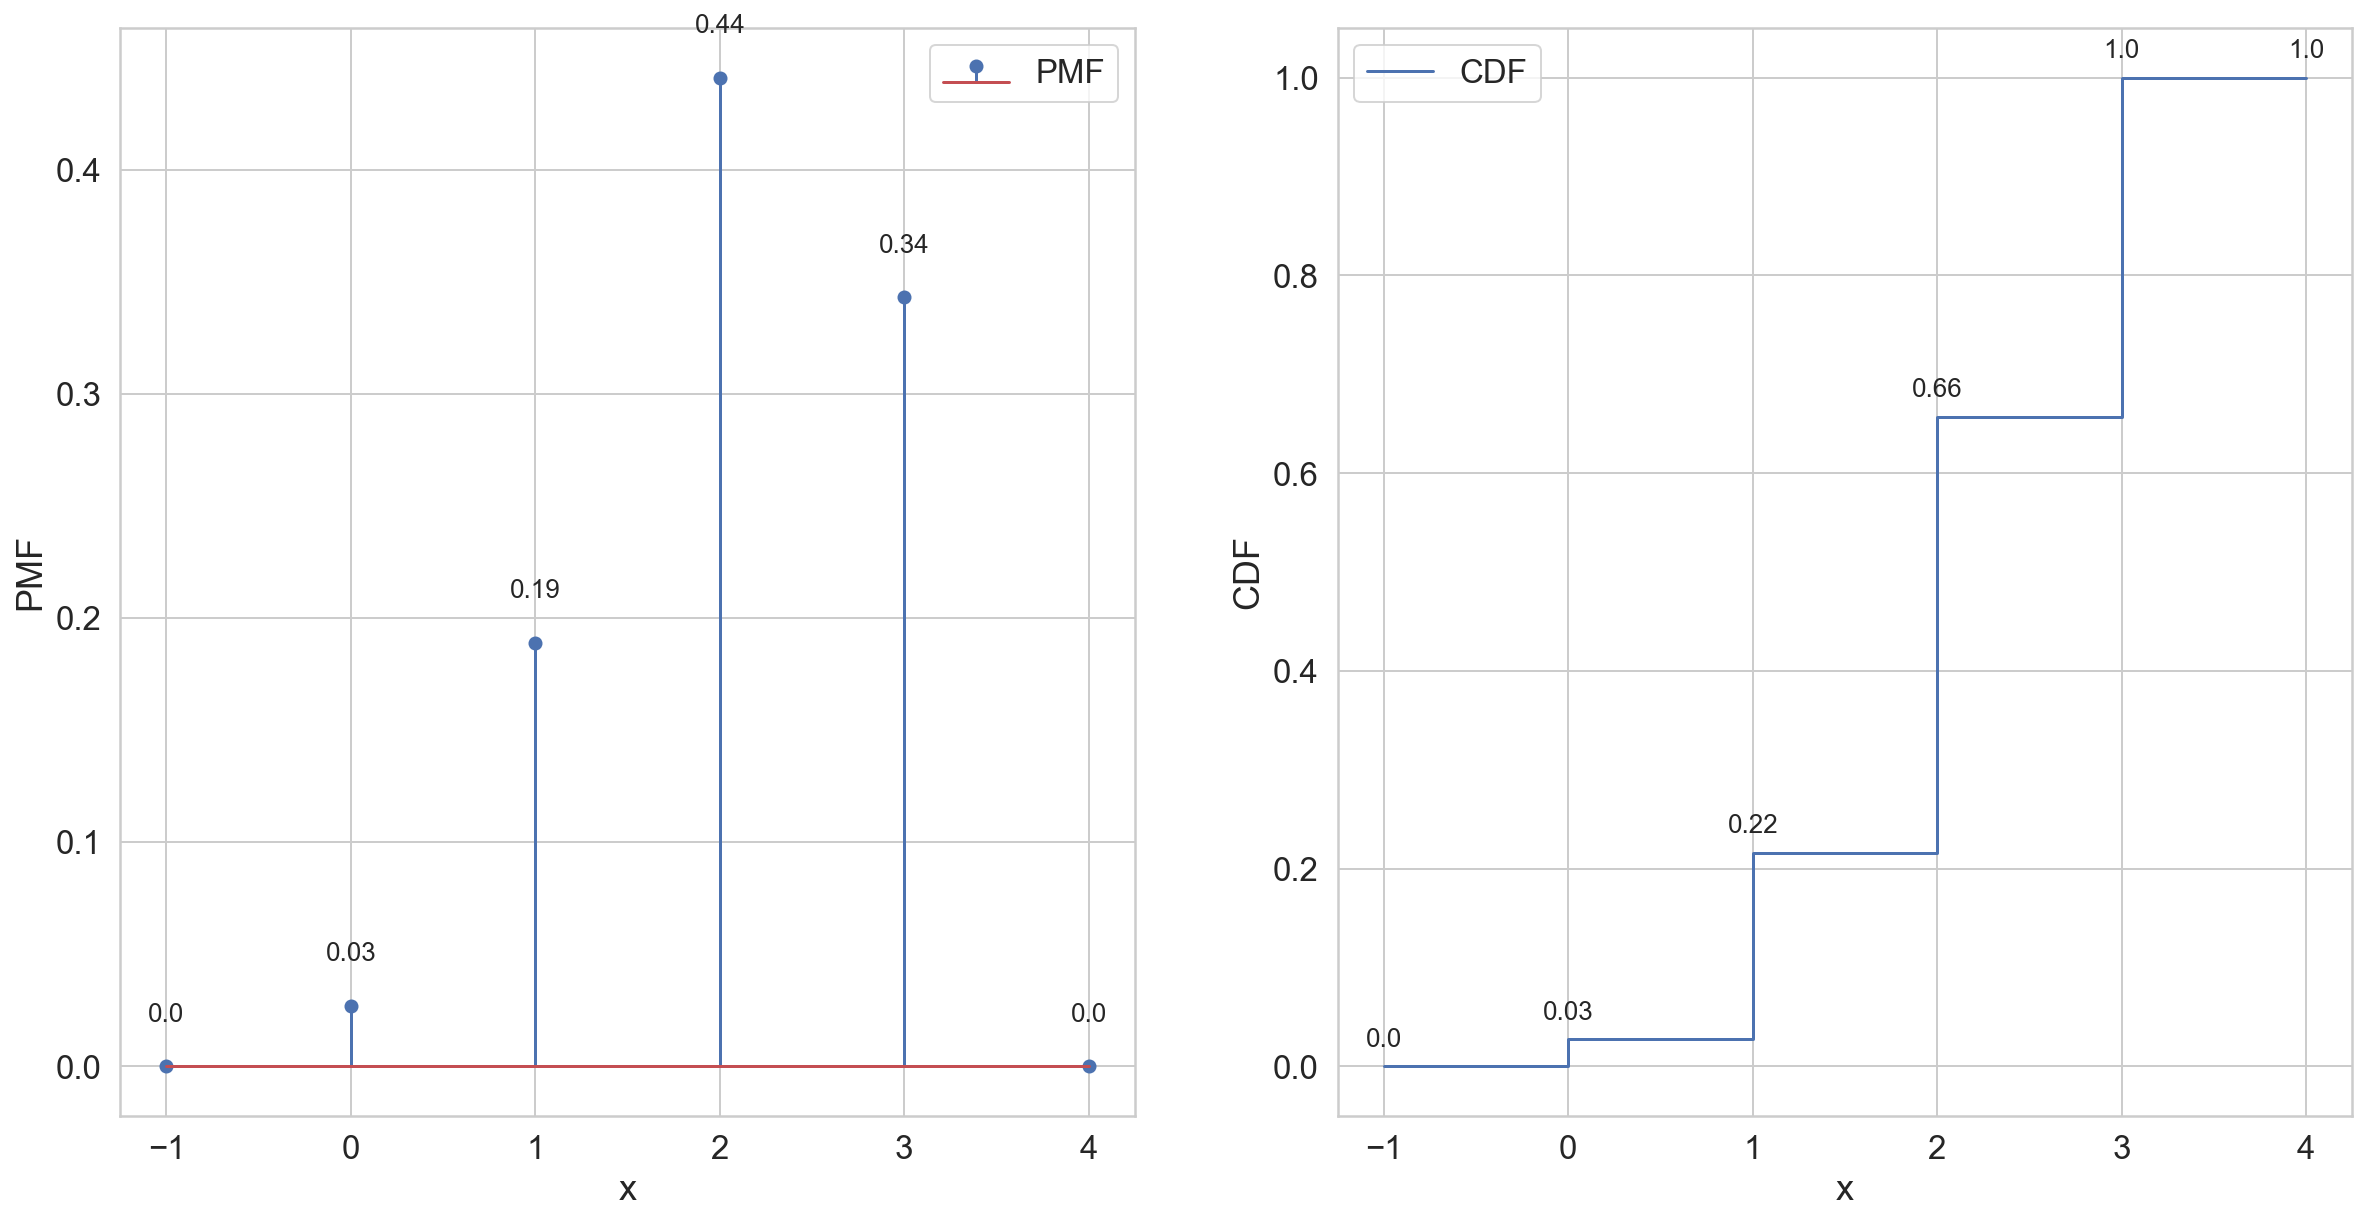

In [3]:
my_binomial = sts.binom(n=3, p=0.7) # import scipy.stats as sts
x = np.arange(-1, 5) # import numpy as np
y = my_binomial.pmf(x)

fig, ax = plt.subplots(1,2)
ax[0].stem(x, y, label="PMF")
for xx, yy in zip(x, y):
    ax[0].text(xx, yy + 0.02, str(round(yy, 2)), horizontalalignment="center")
ax[0].set_xlabel("x")
ax[0].set_ylabel("PMF")
ax[0].legend();

y = my_binomial.cdf(x)

ax[1].step(x, y, where="post", label="CDF")
for xx, yy in zip(x, y):
    ax[1].text(xx, yy + 0.02, str(round(yy, 2)), horizontalalignment="center")
ax[1].set_xlabel("x")
ax[1].set_ylabel("CDF")
ax[1].legend();

## Example 2

A coin is tossed repeatedly until it lands Heads for the first time. Let $X$ be the number of tosses that landed Tails, and let $p$ be the probability of Heads of the coin. Find the distribution of $X$ and its PMF and CDF.

## Solution 2

$$
\mathbb{P}(X = k) = \mathbb{P}(k \text{ tails}) \cdot \mathbb{P}(1 \text{ heads}) = (1 - p)^k p
$$

Geometric distribution $X \sim Geom(p)$

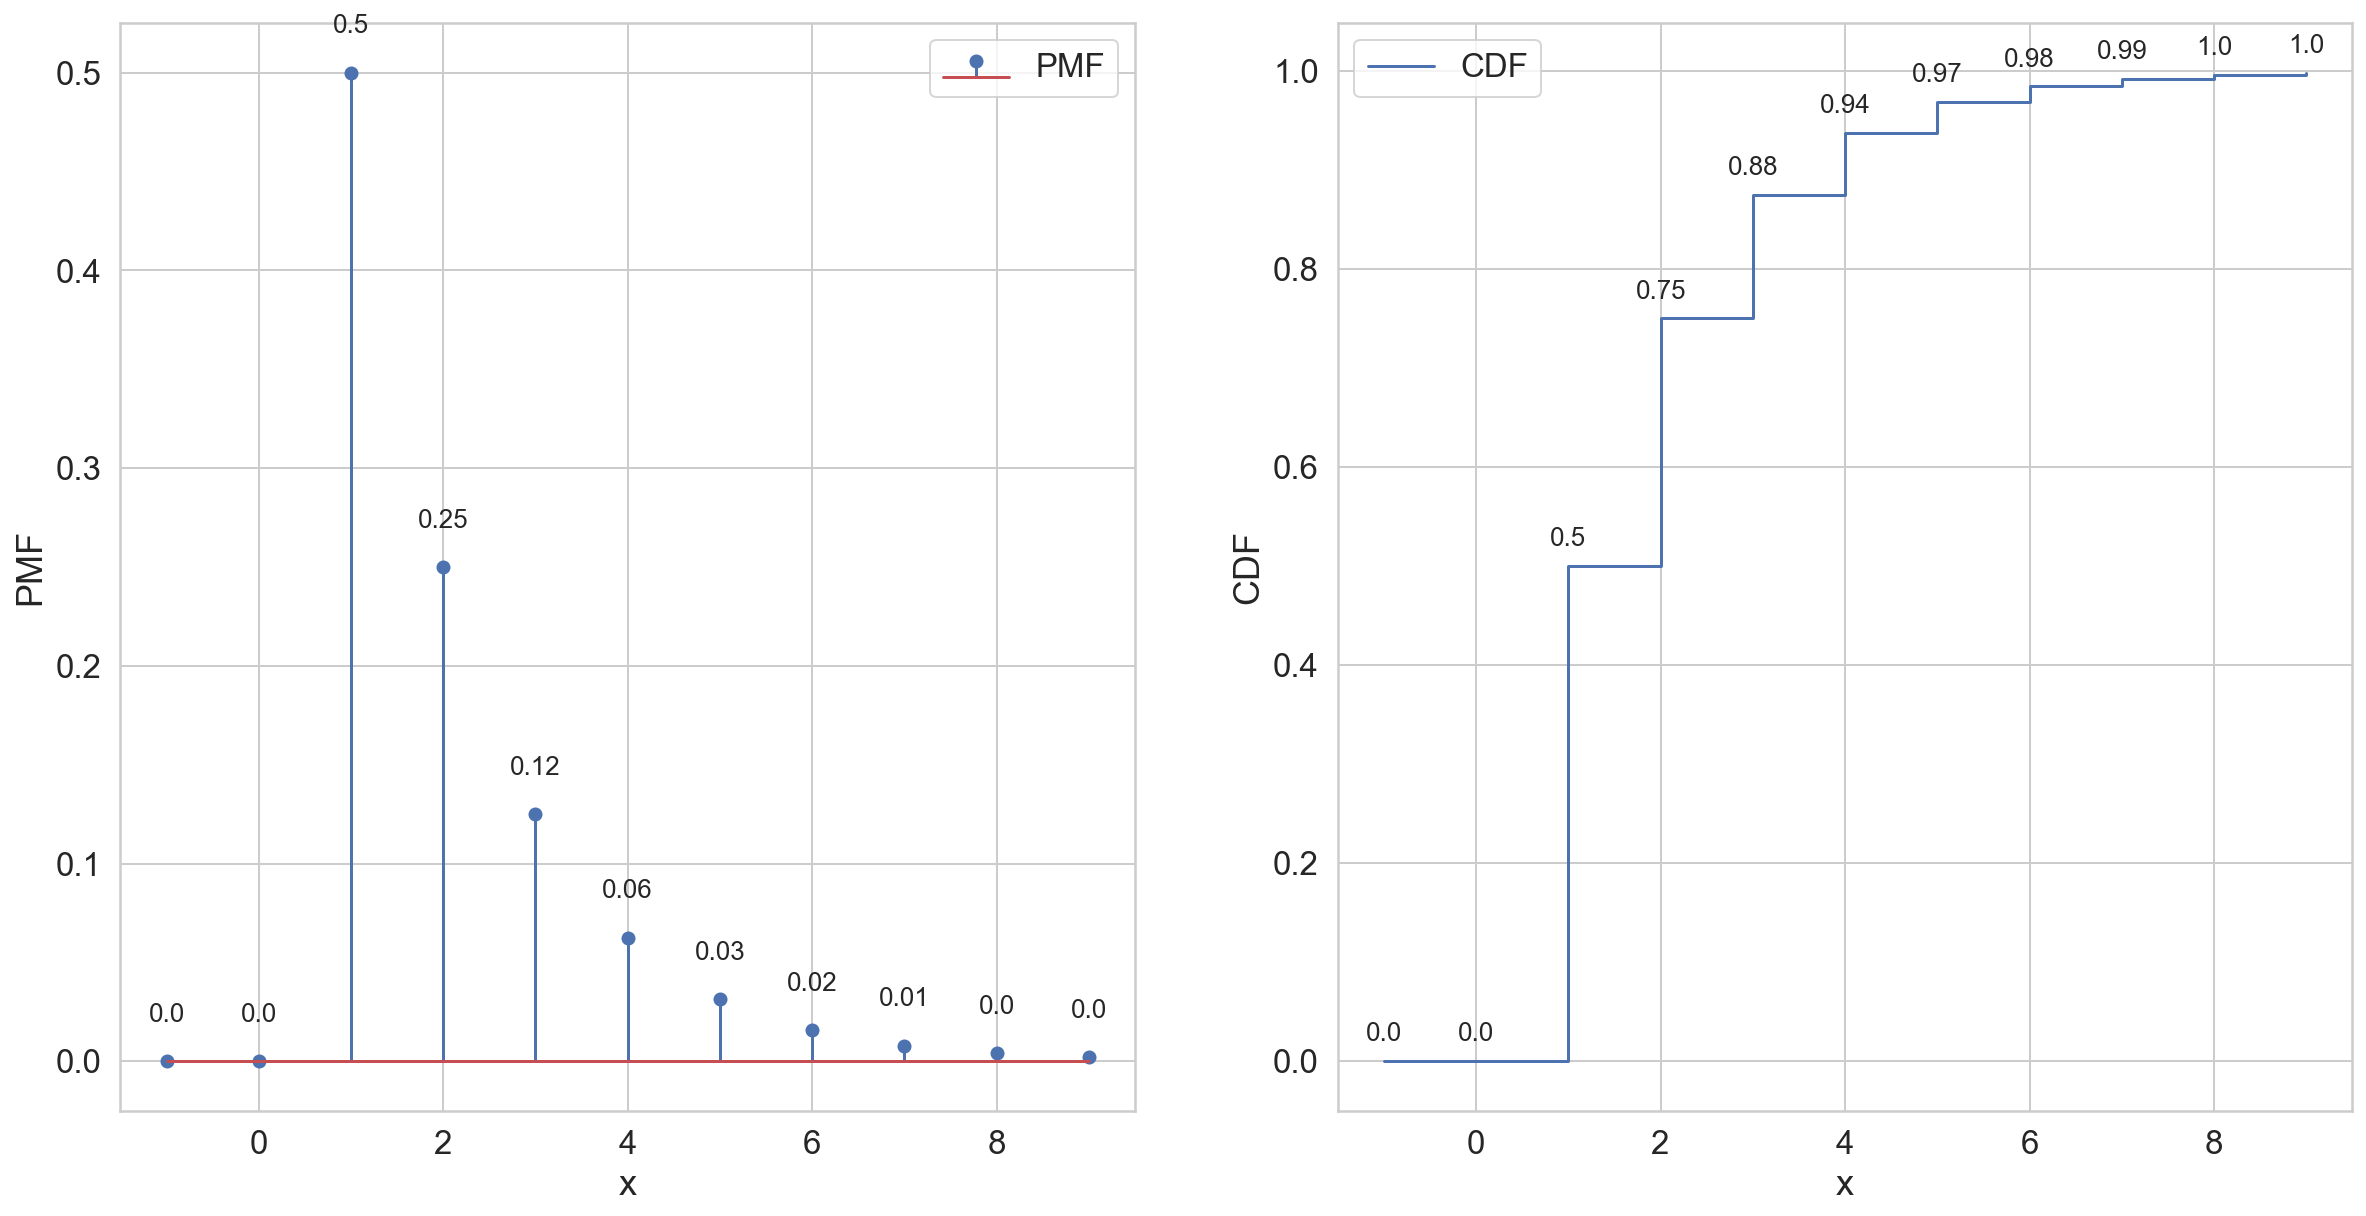

In [10]:
my_geometric = sts.geom(p=0.5)
x = np.arange(-1, 10)
y = my_geometric.pmf(x)

fig, ax = plt.subplots(1,2)
ax[0].stem(x, y, label="PMF")
for xx, yy in zip(x, y):
    ax[0].text(xx, yy + 0.02, str(round(yy, 2)), horizontalalignment="center")
ax[0].set_xlabel("x")
ax[0].set_ylabel("PMF")
ax[0].legend();

y = my_geometric.cdf(x)

ax[1].step(x, y, where="post", label="CDF")
for xx, yy in zip(x, y):
    ax[1].text(xx, yy + 0.02, str(round(yy, 2)), horizontalalignment="center")
ax[1].set_xlabel("x")
ax[1].set_ylabel("CDF")
ax[1].legend();

## Independence of random variables

Reminder: events $A$ and $B$ were called independent if
$$
\mathbb{P}(A \cap B) = \mathbb{P}(A) \mathbb{P}(B)
$$

Random variables $X$ and $Y$ are called **independent** if
$$
\mathbb{P}(X \leqslant x, Y \leqslant y) = \mathbb{P}(X \leqslant x) \mathbb{P}(Y \leqslant y)
$$

## Example 3

You roll two dice. $X$ is the random result of first die, $Y$ is the random result of second die, $Z = X+Y$.

How do we find the distribution of $Z$?

$$
\mathbb{P}(Z = k) = \sum_{m} \mathbb{P}(X = m) \mathbb{P}(Y = k - m)
$$

- Are $X$ and $Y$ independent?

Yes

- Are $X$ and $Z$ independent?

No

## Transformations of random variables

Random variables transform like functions, i.e. if $Y=\varphi(X)$, then
$$
Y(\omega) = \varphi(X(\omega))
$$

## Example 4

Let $X$ be a random variable with CDF $F_X$. Find CDF of $Y = a X + b$.

## Solution 4

If $a > 0$:
$$
F_Y(y) = \mathbb{P}(Y \leqslant y) = \mathbb{P}(a X + b \leqslant y) = \mathbb{P}\left(X \leqslant \frac{y - b}{a}\right)
$$

## Example 5

Let $X \sim Be(p)$. Find CDF of $Y = 2X$.

## Solution 5

$$
F_Y = \mathbb{P}(Y \leqslant y) = \mathbb{P}(2 X \leqslant y) = \mathbb{P}\left(X \leqslant \tfrac{y}{2}\right) = F_X\left(\tfrac{y}{2}\right)
$$

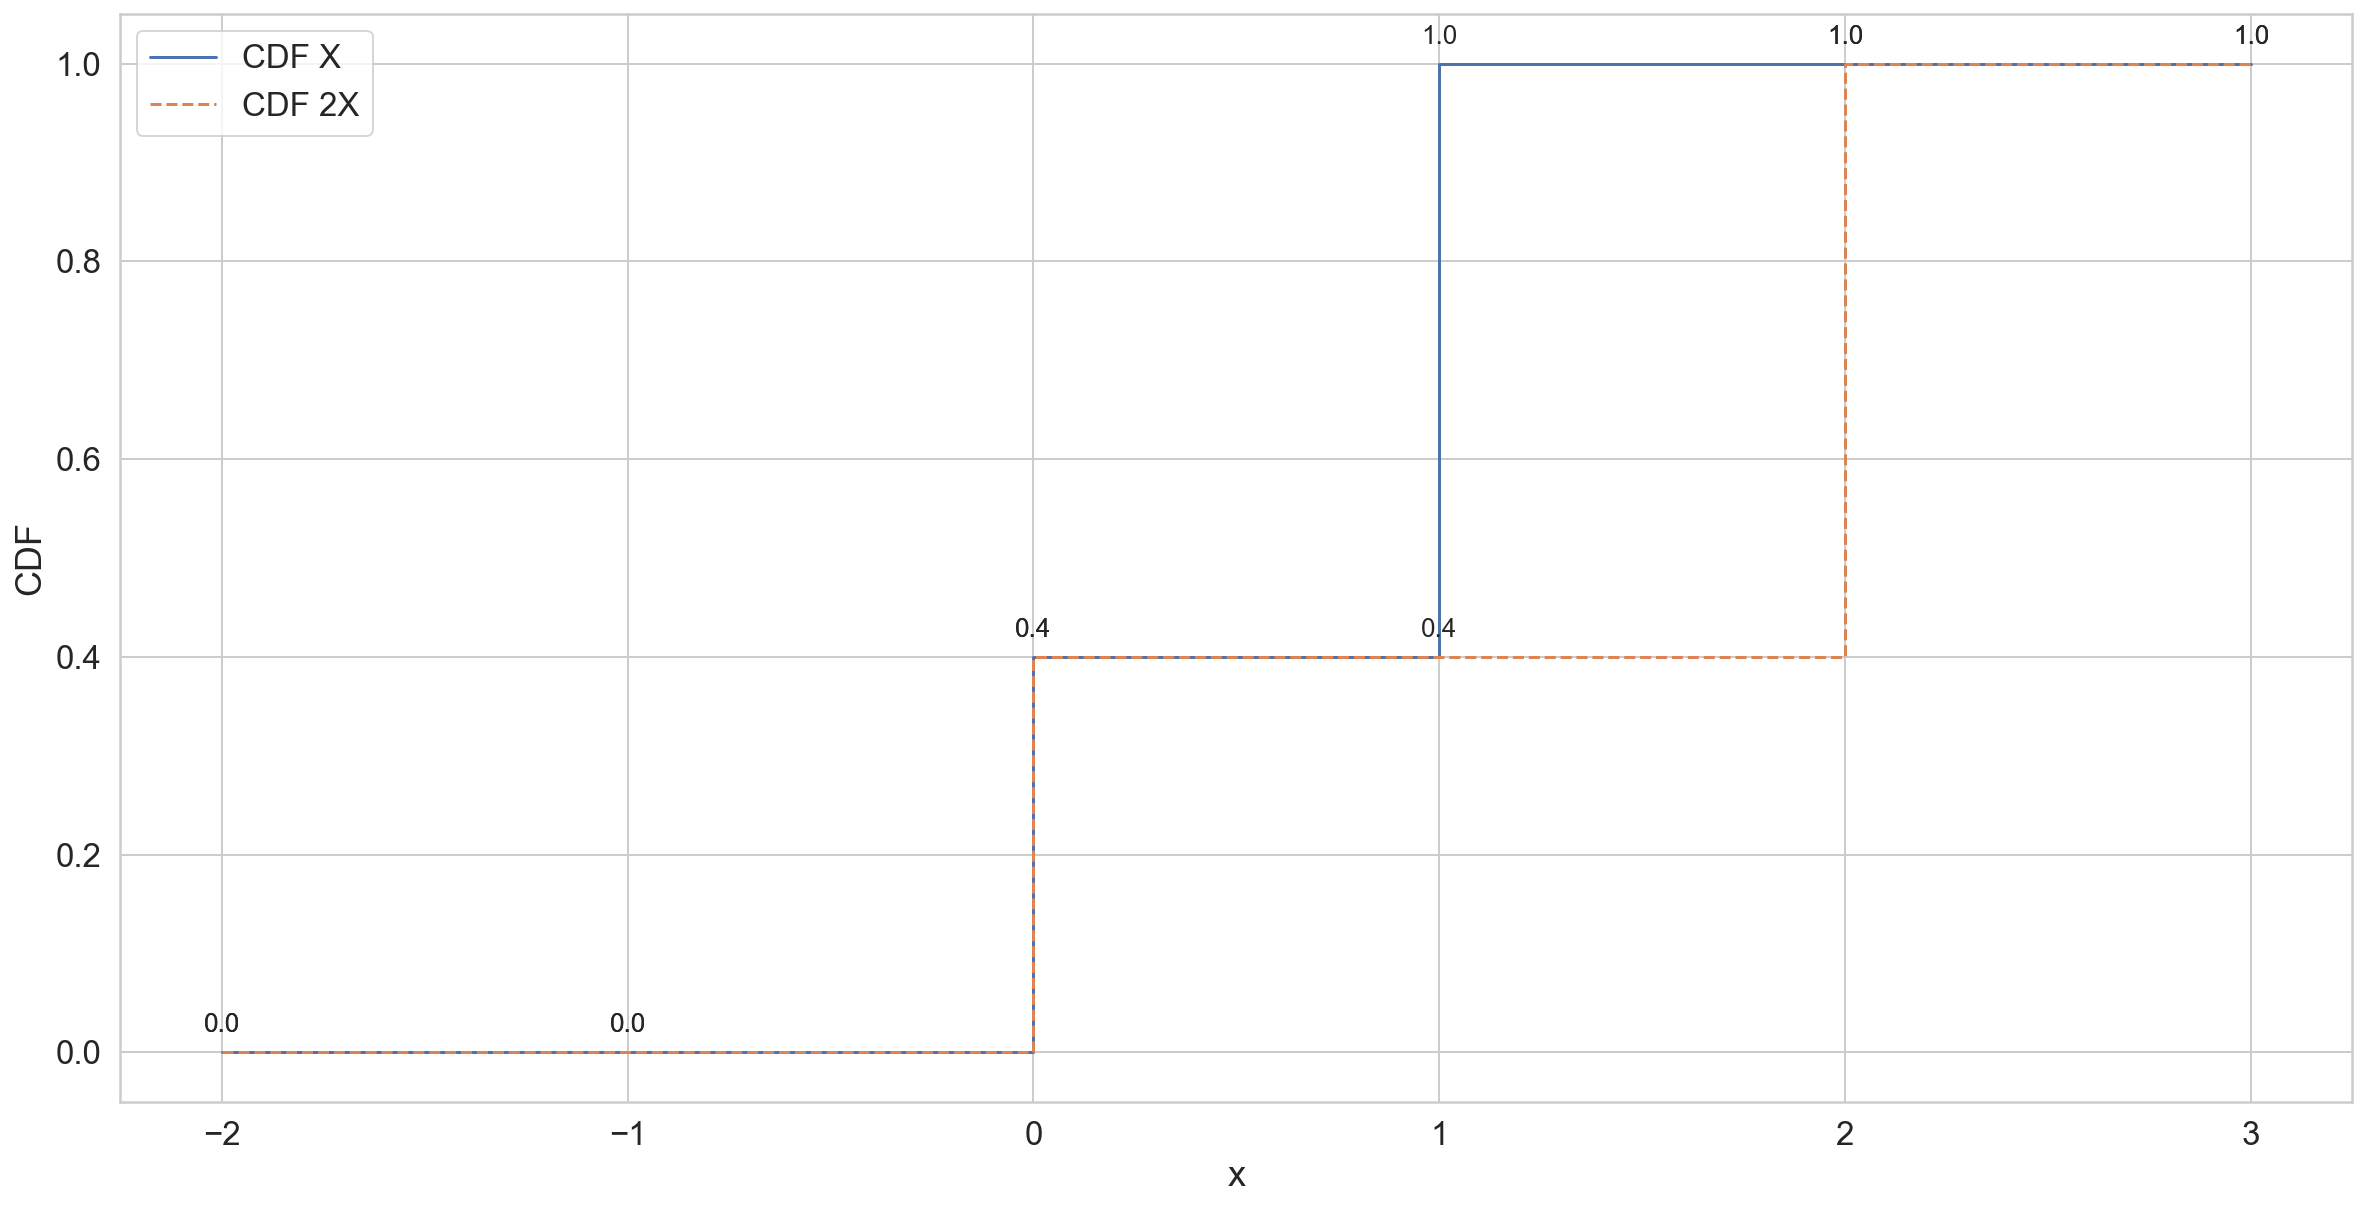

In [5]:
my_bernoulli = sts.bernoulli(p=0.6)
x = np.arange(-2, 4)
y = my_bernoulli.cdf(x)
y2 = my_bernoulli.cdf(x / 2)

fig, ax = plt.subplots()
ax.step(x, y, where="post", label="CDF X")
ax.step(x, y2, where="post", ls="--", label="CDF 2X")
for xx, yy, yy2 in zip(x, y, y2):
    ax.text(xx, yy + 0.02, str(round(yy, 2)), horizontalalignment="center")
    ax.text(xx, yy2 + 0.02, str(round(yy2, 2)), horizontalalignment="center")
ax.set_xlabel("x")
ax.set_ylabel("CDF")
ax.legend();

## Example 6

Let $X \sim Be(p)$. Find the distribution of $Y = X^2$.

## Solution 6

- $X \sim Be(p)$
- $X \in \{0, 1\}$
- $Y = X^2$
- $Y \in \{0, 1\}$

So we need to define PMF at 0 and 1:

$$
\begin{cases}
\mathbb{P}(Y = 0) = \mathbb{P}(X^2 = 0) = \mathbb{P}(X = \sqrt{0}) = \mathbb{P}(X = 0) = 1 - p \\
\mathbb{P}(Y = 1) = \mathbb{P}(X^2 = 1) = \mathbb{P}(X = \pm \sqrt{1}) = \mathbb{P}(X = -1) + \mathbb{P}(X = 1) = 0 +p = p
\end{cases}
$$